In [124]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [125]:
df = pd.read_csv("insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


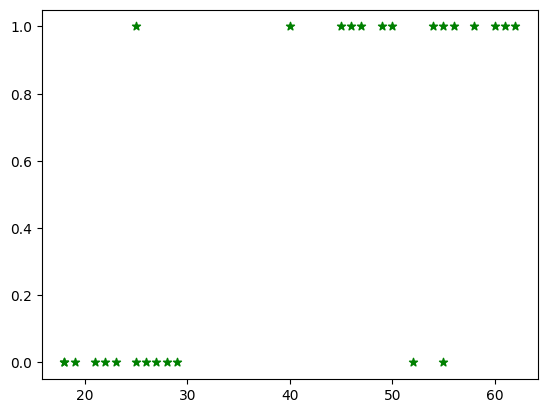

In [126]:
plt.scatter(df.age,df.bought_insurance, marker ='*', color='green')

In [127]:
df.shape

(27, 2)

In [128]:
from sklearn.model_selection import train_test_split

In [129]:
# Now split the data
X_train, X_test, y_train, y_test = train_test_split(df[['age']], df.bought_insurance, test_size=0.1)

In [130]:
X_test

,age
1,25
2,47
11,28


In [131]:
X_train

,age
4,46
26,23
10,18
25,54
20,21
16,25
18,19
19,18
7,60
6,55


In [132]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [133]:
model.fit(X_train, y_train)

LogisticRegression()

In [134]:
model.predict(X_test)

array([0, 1, 0])

In [135]:
model.score(X_test, y_test)

1.0

In [136]:
model.predict_proba(X_test)

array([[0.84209295, 0.15790705],
       [0.2592982 , 0.7407018 ],
       [0.78625493, 0.21374507]])

In [137]:
model.predict([[56]])

c:\Users\MAHMUD\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [138]:
model.predict([[23]])

c:\Users\MAHMUD\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

# logistic_regression_exercise

In [139]:
df1 = pd.read_csv("HR_comma_sep.csv")
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


##### Data exploration and visualization

In [140]:
left = df1[df1.left==1]
left.shape

(3571, 10)

In [141]:
retained = df1[df1.left==0]
retained.shape

(11428, 10)

Impact of salary on employee retention

<Axes: xlabel='salary'>

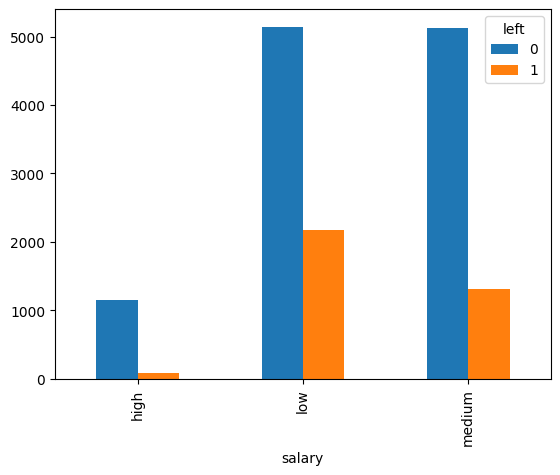

In [142]:
pd.crosstab(df1.salary,df1.left).plot(kind='bar')

Department wise employee retention rate

<Axes: xlabel='Department'>

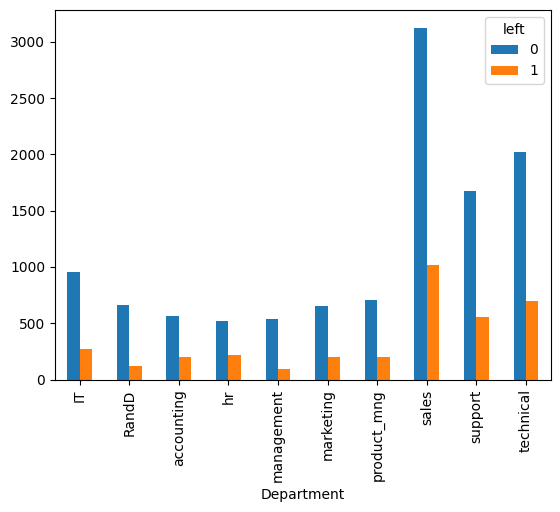

In [143]:
pd.crosstab(df1.Department,df1.left).plot(kind='bar')

From the data analysis so far we can conclude that we will use following variables as independant variables in our model

In [144]:
subdf = df1[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


Tackle salary dummy variable

In [145]:
salary_dummies = pd.get_dummies(subdf.salary, prefix="salary")

In [146]:
df_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')

In [147]:
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,False,True,False
1,0.80,262,0,medium,False,False,True
2,0.11,272,0,medium,False,False,True
3,0.72,223,0,low,False,True,False
4,0.37,159,0,low,False,True,False


In [148]:
df_with_dummies['salary_high'] = df_with_dummies['salary_high'].astype(int)
df_with_dummies['salary_low'] = df_with_dummies['salary_low'].astype(int)
df_with_dummies['salary_medium'] = df_with_dummies['salary_medium'].astype(int)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [149]:
df_with_dummies.drop('salary',axis='columns',inplace=True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [150]:
X = df_with_dummies
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [151]:
y = df1.left

In [152]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)

In [153]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [154]:
model.fit(X_train, y_train)

LogisticRegression()

In [155]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], shape=(10500,))

Accuracy of the model

In [156]:
model.score(X_test,y_test)

0.7764761904761904